In [ ]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']
data = pd.read_csv(url, names=names)

In [ ]:
# Replace missing values with NaN
data.replace('?', np.nan, inplace=True)

In [ ]:
# Convert columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')


In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)
data.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# Split data into features and target
X = data.drop('hd', axis=1)
y = data['hd']
y = y >= 1
print(y)

0      False
1       True
2       True
3      False
4      False
       ...  
297     True
298     True
299     True
300     True
301     True
Name: hd, Length: 297, dtype: bool


In [ ]:
# Encoding categorical variables
X_encoded = pd.get_dummies(X, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print(y_train)

277    False
262    False
30     False
22      True
281    False
       ...  
190    False
71      True
107     True
274     True
103    False
Name: hd, Length: 237, dtype: bool


In [ ]:
# Building a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Printing the feature importance array
feature_importances = rf_model.feature_importances_
print("Feature Importance:")
for feature, importance in zip(X_encoded.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importance:
age: 0.08321595105624648
restbp: 0.07304498919722292
chol: 0.08258397538375609
thalach: 0.1056176251325031
oldpeak: 0.09266168201522013
ca: 0.11120239386302284
sex_0.0: 0.018861054682082077
sex_1.0: 0.014310099199952101
cp_1.0: 0.010488804826487959
cp_2.0: 0.010040471243046903
cp_3.0: 0.01895757496388778
cp_4.0: 0.08088226046968787
fbs_0.0: 0.006977680238969682
fbs_1.0: 0.008812428974831877
restecg_0.0: 0.011274149243572007
restecg_1.0: 0.00037780044046029516
restecg_2.0: 0.013295535432745885
exang_0.0: 0.032930917737060306
exang_1.0: 0.04035620207304168
slope_1.0: 0.020699769441428047
slope_2.0: 0.019848618727828227
slope_3.0: 0.004187267158925488
thal_3.0: 0.056839987502085514
thal_6.0: 0.004821972045551775
thal_7.0: 0.0777107889503829


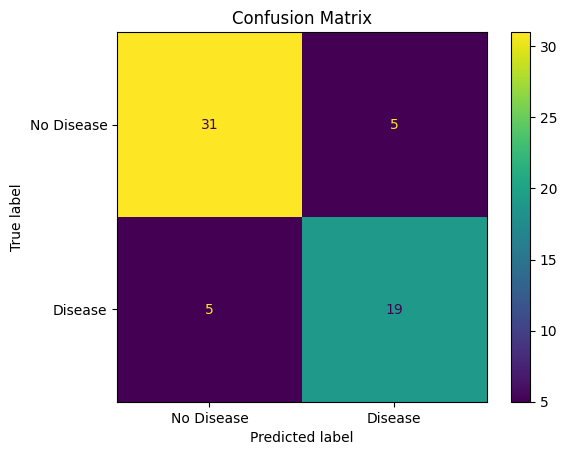

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


# Plotting the confusion matrix using ConfusionMatrixDisplay
y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Disease', 'Disease'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

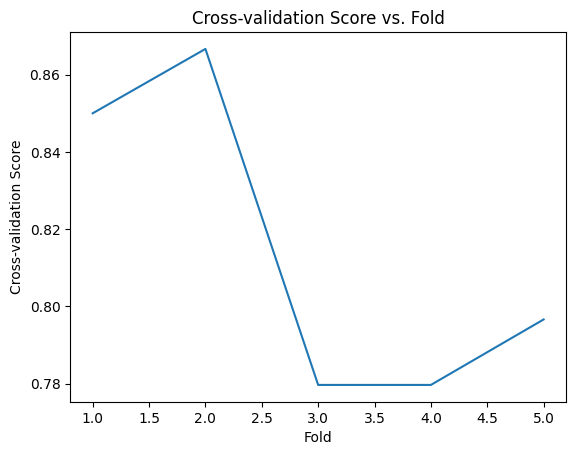

In [ ]:
# Finding cross-validation score and plotting it
cv_scores = cross_val_score(rf_model, X_encoded, y, cv=5)
plt.plot(range(1, 6), cv_scores)
plt.xlabel('Fold')
plt.ylabel('Cross-validation Score')
plt.title('Cross-validation Score vs. Fold')
plt.show()


In [ ]:
# Printing Classification score
print("Classification Report:")
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.86      0.86        36
        True       0.79      0.79      0.79        24

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [ ]:
# Finding the optimal Parameters for the model
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Optimal Parameters:")
print(grid_search.best_params_)

Optimal Parameters:
{'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
